<a href="https://colab.research.google.com/github/ChrisMath26/Fisica-Computacional/blob/main/MC/Mecanica_Celeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mecánica Celeste

La ley de gravitación de Newton nos permite establecer la dinámica de un sistema planetario. Supongamos la interacción gravitatoria de la tierra y el sol

$$
F_G = G\frac{M_S M_E}{r^2}
$$

Donde $G$ es la constante de gravitación universal, $M_S$ es la masa solar, $M_E$ es la masa de la tierra y $r$ es la distancia entre la tierra y el sol. Suponiendo que la masa del sol es muy grande como para que su movieminto sea afectado por el de la tierra, podemos asumir que el sol se encuentra inmóvil en el origen de coordenadas. Descomponiendo en las componentes $x$ e $y$ la fuerza que ejerce el sol sobre la tierra, puedo describir la dinámica como

$$
\frac{dx}{dt} = v_x \\
\frac{dv_x}{dt} = -G M_S / r^3 x  \\
\frac{dy}{dt} = v_y \\
\frac{dv_y}{dt} = -G M_S / r^3 y
$$

Considerando que las unidades pueden llegar a ser excesivamente grandes, conviene usar un sistema de unidades razonable. Así si definimos $1 A.U = 1.5 \times 10^{11}m $ como la distancia promedio de la tierra al sol y $1 yr = 3.2 \times 10^7$, el factor $G M_S \approx 4 \pi^2$ AU$^3$/yr. Quedando las ecuaciones como:


$$
\frac{dx}{dt} = v_x \\
\frac{dv_x}{dt} = -4\pi^2 / r^3 x  \\
\frac{dy}{dt} = v_y \\
\frac{dv_y}{dt} = -4\pi^2 / r^3 y
$$


Simule la óribita del planeta tierra usando $x(0) = 1$, $y(0) = 0$, $v_x(0)= 0$, $v_y(0) = 2\pi$

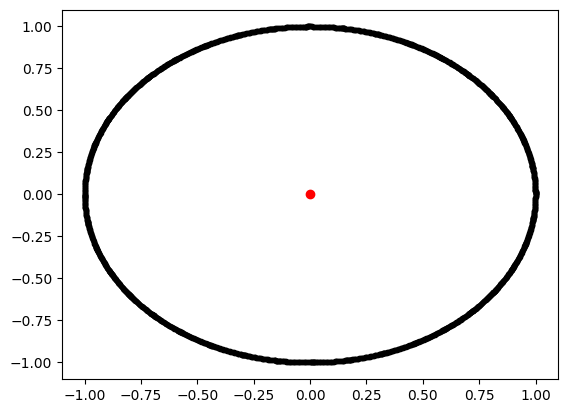

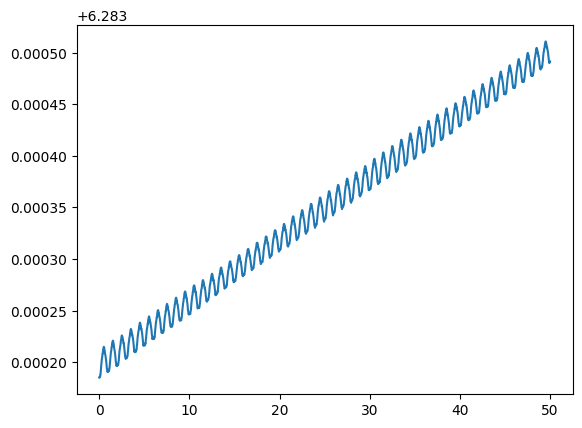

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt
def orbita_planeta(t,X):
  x=X[0]
  vx=X[1]
  y=X[2]
  vy=X[3]
  r=np.sqrt(x**2+y**2)
  F=[vx,-4*np.pi**2*x/r**3,vy,-4*np.pi**2*y/r**3]
  return F
con_in=[1,0,0,2*np.pi]
t_span=[0,50]
tplot=np.linspace(t_span[0],t_span[1],2000)
solucion=solve_ivp(orbita_planeta,t_span,con_in, dense_output=True, rtol=1e-6,atol=1e-8)
x=solucion.sol(tplot)[0]
y=solucion.sol(tplot)[2]
vx=solucion.sol(tplot)[1]
vy=solucion.sol(tplot)[3]

plt.figure()
plt.plot(x,y,'.',color='black')
plt.plot(0,0,'or')
vel_mag=np.sqrt(vx**2+vy**2)
plt.figure()
plt.plot(tplot,vel_mag)

Modifique sus programas para simular la órbita de plutón. La órbita de plutón en su perihelio (punto más cercano al sol) es de $4.4368 \times 10^{12}$m y su velocidad es de $6.1218 \times 10^3$ m/s. Haga una estimación de cuánto dura un año en plutón. Recuerde realizar la transformación de unidades:

$$
4.4368 \times 10^{12}m \times \frac{1AU}{1.5 \times 10^{11}m} = \\
6.1218 \times 10^3 m/s \times \frac{1AU}{1.5 \times 10^{11}m} \times \frac{3.2 \times 10^7 s}{1 yr} =
$$

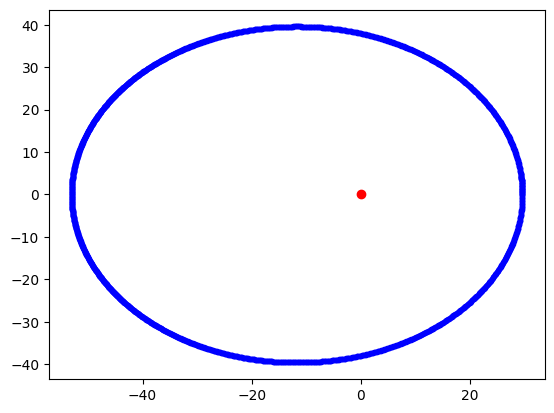

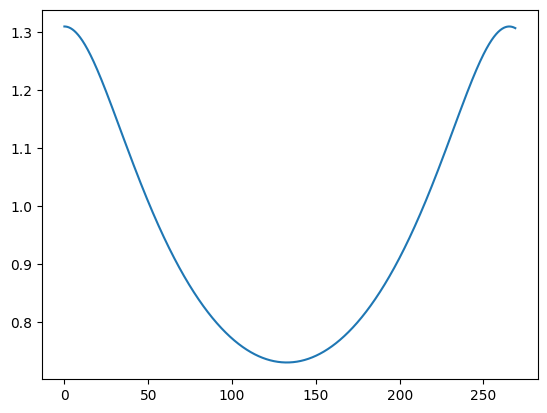

In [ ]:
def orbita_planeta(t,X):
  x=X[0]
  vx=X[1]
  y=X[2]
  vy=X[3]
  r=np.sqrt(x**2+y**2)
  F=[vx,-4*np.pi**2*x/r**3,vy,-4*np.pi**2*y/r**3]
  return F
perihelio_P=29.578
vel_perihelio=1.309
con_in=[perihelio_P,0,0,vel_perihelio]
t_span=[0,269]
tplot=np.linspace(t_span[0],t_span[1],2000)
solucion=solve_ivp(orbita_planeta,t_span,con_in, dense_output=True, rtol=1e-6,atol=1e-8)
x=solucion.sol(tplot)[0]
y=solucion.sol(tplot)[2]
vx=solucion.sol(tplot)[1]
vy=solucion.sol(tplot)[3]
plt.figure()
plt.plot(x,y,'.',color='blue')
plt.plot(0,0,'or')
vel_mag=np.sqrt(vx**2+vy**2)
plt.figure()
plt.plot(tplot,vel_mag)

## Problema de los 3 cuerpos

Al considerar mas de dos cuerpos, los problemas en mecánica celeste aumentan considerablemente en complejidad. El rey Oscar II de Suecia y Noruega propuso a finales del siglo XIX un premio para quien obtuviera una solución analítica al problema de los 3 cuerpos que se mostraba elusivo hasta entonces.

El premio paradójicamente se lo ganó Henri Poincaré postulando que era imposible otener una solución analítica de dicho problema. Se atribuye de hecho a esa observación el concepto de sistema Caótico, un sistema que a pesar de ser completamente determinísta no es posible predecir el comportamiento.

El problema de los 3 cuerpos para el sistema formado por Tierra, Júpiter y Sol está descrito por

$$
\dot{x}_e = v_{x,e} \quad \dot{y}_e = v_{y,e} \\
\dot{v}_{x,e} = -\frac{4\pi^2}{r_e^3} x_e - \frac{4\pi^2}{r_{ej}^3} \frac{M_j}{M_s} (x_e - x_j) \\
\dot{v}_{y,e} = -\frac{4\pi^2}{r_e^3} y_e - \frac{4\pi^2}{r_{ej}^3} \frac{M_j}{M_s} (y_e - y_j) \\
\dot{x}_j = v_{x,j} \quad  \dot{y}_j = v_{y,j} \\
\dot{v}_{x,j} = -\frac{4\pi^2}{r_j^3} x_j - \frac{4\pi^2}{r_{ej}^3} \frac{M_e}{M_s} (x_j - x_e) \\
\dot{v}_{y,j} = -\frac{4\pi^2}{r_j^3} y_j - \frac{4\pi^2}{r_{ej}^3} \frac{M_e}{M_s} (y_j - y_e)
$$


Realice la simulación del problema de los 3 cuerpos. Incremente la masa de Júpiter usando 10$M_j$, 100$M_j$ y 1000$M_j$. Qué sucede con la órbita de la tierra en cada caso?

<ipython-input-6-2b9714f819b6>:30: RuntimeWarning: overflow encountered in scalar power
  Aux_Vye = -4 * np.pi**2*ye / re**3 - 4 * np.pi**2*(ye - yj) * Mj*v / (Ms**rej**3)
<ipython-input-6-2b9714f819b6>:33: RuntimeWarning: overflow encountered in scalar power
  Aux_Vxj = -4 * np.pi**2*xj / rj**3 - 4 * np.pi**2*(xj - xe) * Me / (Ms**rej**3)
<ipython-input-6-2b9714f819b6>:34: RuntimeWarning: overflow encountered in scalar power
  Aux_Vyj = -4 * np.pi**2*yj / rj**3 - 4 * np.pi**2*(yj - ye) * Me / (Ms**rej**3)


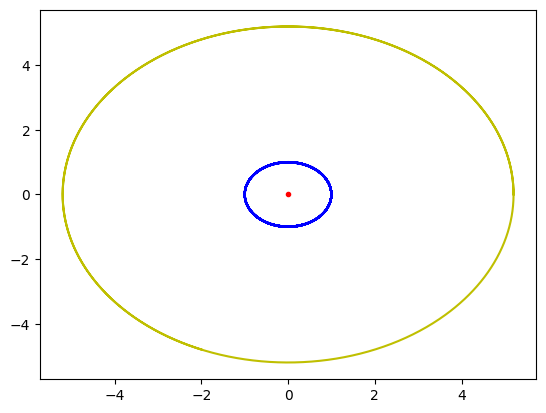

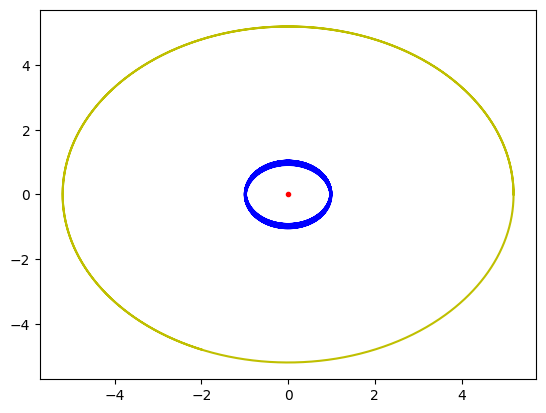

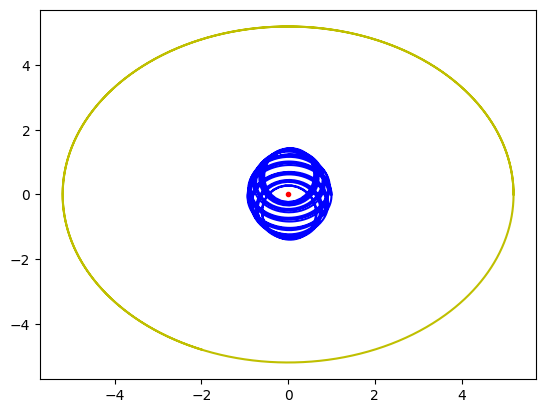

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
# Vamos a tener las siguientes posiciones en el vector X
#  X = [xe, ye, Vxe, Vye, xj, yj, Vxj, Vyj]
# Definimos las condiciones iniciales.
CI = [1, 0, 0, 2*np.pi, 5.2, 0, 0, 2.755]

# Definimos la función.
def problema_tres_cuerpos(t, X, v, Mj = 1.8981e27, Me = 5.9721e24, Ms = 1.9891e30):
  # Definimos las variables.
  xe = X[0]
  ye = X[1]
  Vxe = X[2]
  Vye = X[3]
  xj = X[4]
  yj = X[5]
  Vxj = X[6]
  Vyj = X[7]
  # Definimos las distancias entre los cuerpos celestes como:
  re = np.sqrt(xe**2 + ye**2)
  rj = np.sqrt(xj**2 + yj**2)
  rej = np.sqrt((xe - xj)**2 + (ye - yj)**2)


  # Definimos las funciones auxiliares  xe, ye, Vxe, Vye, xj, yj, Vxj, Vyj
  Aux_xe = Vxe
  Aux_ye = Vye
  Aux_Vxe = -4 * np.pi**2*xe / re**3 - 4 * np.pi**2*(xe - xj) * Mj*v/ (Ms*rej**3)
  Aux_Vye = -4 * np.pi**2*ye / re**3 - 4 * np.pi**2*(ye - yj) * Mj*v / (Ms**rej**3)
  Aux_xj = Vxj
  Aux_yj = Vyj
  Aux_Vxj = -4 * np.pi**2*xj / rj**3 - 4 * np.pi**2*(xj - xe) * Me / (Ms**rej**3)
  Aux_Vyj = -4 * np.pi**2*yj / rj**3 - 4 * np.pi**2*(yj - ye) * Me / (Ms**rej**3)
  return [Aux_xe, Aux_ye, Aux_Vxe, Aux_Vye, Aux_xj, Aux_yj, Aux_Vxj, Aux_Vyj]
tspan = [0,20] # Se define éste tiempo ya que es el tiempo aproximado de una vuelta de júpiter.
tplot = np.linspace(tspan[0], tspan[-1], 2000)

# Cambio de masas Júpiter
masas_jupiter = [10, 100, 1000]

for i in range(0, len(masas_jupiter)):
  v = masas_jupiter[i]
  solucion = solve_ivp(problema_tres_cuerpos, tspan, CI, args=(v,), dense_output=True,  rtol = 1e-6, atol= 1e-8)

  # Gráfico de la órbita de la Tierra y Júpiter
  xe = solucion.sol(tplot)[0]
  ye = solucion.sol(tplot)[1]
  xj = solucion.sol(tplot)[4]
  yj = solucion.sol(tplot)[5]

  plt.figure()
  plt.plot(xe ,ye, '-b')
  plt.plot(xj ,yj, '-y')
  plt.plot(0, 0, '.r')